In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras import Sequential

In [8]:
imgs_path = "data/Train/"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


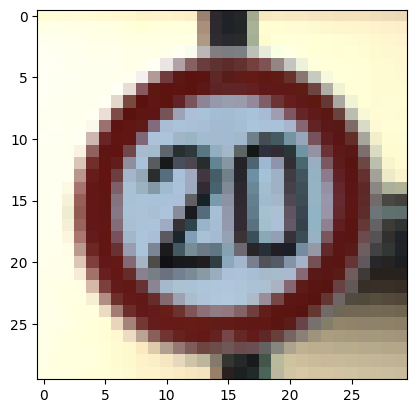

In [10]:
path = "data/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 36s 71ms/step - loss: 2.1779 - accuracy: 0.4722 - val_loss: 0.5785 - val_accuracy: 0.8486
Epoch 2/15
491/491 [==============================] - 36s 72ms/step - loss: 0.5537 - accuracy: 0.8416 - val_loss: 0.1229 - val_accuracy: 0.9699
Epoch 3/15
491/491 [==============================] - 32s 66ms/step - loss: 0.3125 - accuracy: 0.9115 - val_loss: 0.0723 - val_accuracy: 0.9834
Epoch 4/15
491/491 [==============================] - 32s 66ms/step - loss: 0.2376 - accuracy: 0.9339 - val_loss: 0.0462 - val_accuracy: 0.9866
Epoch 5/15
491/491 [==============================] - 32s 66ms/step - loss: 0.1877 - accuracy: 0.9480 - val_loss: 0.0467 - val_accuracy: 0.9881
Epoch 6/15
491/491 [==============================] - 32s 66ms/step - loss: 0.1728 - accuracy: 0.9513 - val_loss: 0.0375 - val_accuracy: 0.9907
Epoch 7/15
491/491 [==============================] - 33s 68ms/step - loss: 0.1762 - accuracy: 0.9526 - val_loss: 0.0418 - val_accuracy:

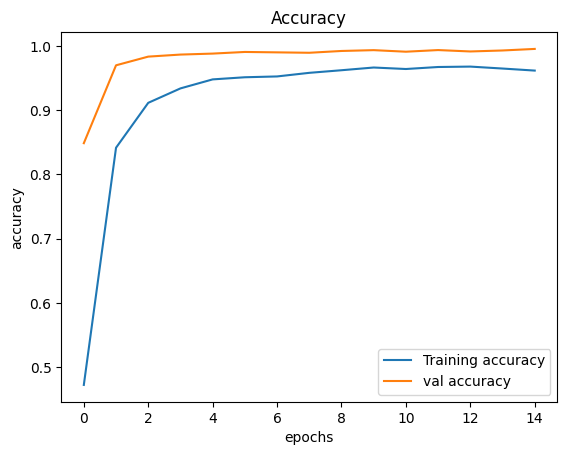

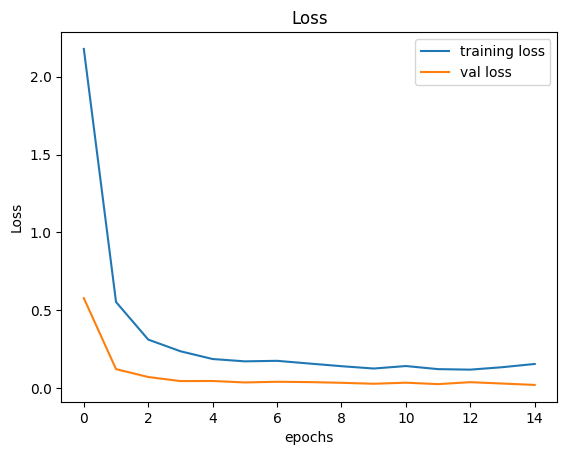

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("data/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "data"
test_imgs = test['Path'].values
test_data = []
# test_labels = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
# predictions = model.predict_classes(test_data)
predict_x = model.predict(test_data) 
classes_x = np.argmax(predict_x, axis=1)
print("accuracy: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 8s 19ms/step
accuracy:  0.9711797307996833


In [4]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(classes_x, test_labels))
print(confusion_matrix(classes_x, test_labels))

NameError: name 'classes_x' is not defined